# 10.2 Linien-, Balken- und Streudiagramme

## Lernziele

```{admonition} Lernziele
:class: hint
* Sie können **Matplotlib** mit der üblichen Abkürzung **plt** importieren.
* Sie können Funktionen als **Liniendiagramm** visualisieren.
* Sie können diskrete Daten als **Balkendiagramm** visualisieren.
* Sie können Messwerte mit **Streudiagrammen** darstellen. 
```

## Liniendiagramme 

Liniendiagramme werden zur Visualisierung benutzt, wenn die Daten kontinuierlich
sind und zu jedem x-Wert ein y-Wert vorliegt. Am häufigsten ist dies der Fall,
wenn die Daten von einer mathematischen Funktion stammen. Obwohl die Daten
theoretisch für jeden x-Wert vorliegen und wir daher Millionen von (x,y)-Punkten
zeichnen könnten, benutzen wir eine Weretabelle mit weniger (x,y)-Paaren. Die
Anzahl der (x,y)-Paare bestimmt dann, wie "glatt" die Visualisierung wirkt.

Erzeugen wir uns eine Liste mit x-Werten und dazugehörigen y-Werten.

In [1]:
x = [-2, -1, 0, 1, 2]
y = [4, 1, 0, 1, 4]

Danach lassen wir den Interpreter diese Werte zeichnen. Dazu benötigen wir das
Modul `matplotlib`, genauer gesagt nur einen Teil dieses Moduls namens `pylab`.
Daher laden wir es zuerst mit der typischen Abkürzung `plt`.

In [2]:
import matplotlib.pylab as plt

Matplotlib bietet zwei Schnittstellen an, die Funktionen und Methoden des Moduls
zu benutzen. Die erste Schnittstelle ist **zustandsorientiert**, die zweite
**objektorientiert**. Die zustandsorientierte Schnittstelle ist älter. Die
Entwickler:innen des Matplotlib-Moduls orientierten sich zunächst an der
kommerziellen Software MATLAB und griffen erst in einer späteren Phase auf
Objektorientierung zurück. 

Bei der zustandsorientierten Schnittstelle werden Funktionen benutzt, die auf
das aktuelle Objekt wirken. Das hat Nachteile, wenn beispielsweise mehrere Plots
in einer Grafik gegenübergestellt werden. Dann ist es schwierig zuzuordnen, was
gerade das aktuelle Objekt ist. Daher hilft die zweite Matplotlib-Schnittstelle,
die objektorientierte Schnittstelle, mehrere Objekte auseinanderzuhalten. Wir
werden in dieser Vorlesung die objektorientierte Schnittstelle verwenden.

Zunächst erzeugen wir das Grafik-Objekt bestehend aus einer Figure (=Grafik als
Ganzes) und Axes (=Achsen) explizit mit der Funktion ``plt.subplots()``und
speichern diese in entsprechenden Variablen. Dann verwenden wir Methoden, das
Grafikobjekt zu manipulieren. Beispielsweise fügen wir den Achsen einen
Linienplot und Beschriftungen hinzu.

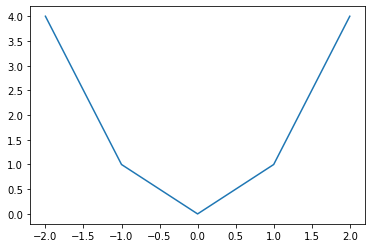

In [3]:
fig, ax = plt.subplots() 
ax.plot(x,y)

PS: Ohne Strichpunkt/Semikolon gibt Jupyter-Lab noch Objekttyp und Referenz des
Speicherplatzes aus. In einem normalen Python-Skript würde das nicht passieren.
Sie können diese Angabe durch den Strichpunkt/Semikolon in der letzten Zeile
unterdrücken.

Aber zurück zum Plot, sieht ziemlich krakelig aus. Eigentlich sollte dies eine
Parabel im Intervall $[-2,2]$ werden. Mit nur 5 Punkten und der Tatsache, dass
diese 5 Punkte mit geraden Linien verbunden werden, sieht es etwas unschön aus.
Besser wird es mit mehr Punkten, aber die wollen wir jetzt nicht von Hand
erzeugen. Wir verwenden das Modul `numpy` für numerisches Python, das wir wieder
einmal zuerst laden müssen:

```python
import numpy as np
```

Die Funktion `np.linspace(a,b, Anzahl)` erzeugt Punkte im Intervall $[a,b]$ je
nach eingestellter Anzahl.

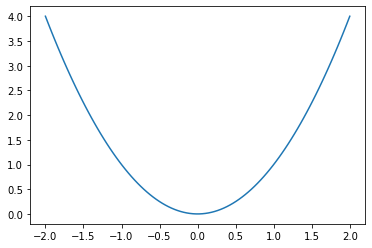

In [4]:
import numpy as np

x = np.linspace(-2, 2, 100) 
y = x**2

fig, ax = plt.subplots()
ax.plot(x,y);

Nächstes Thema, Beschriftungen. Mit den Methoden `.set_xlabel()` und
`.set_ylabel()` beschriften Sie die x- und y-Achse. Mit `.set_title()` wird der
Titel gesetzt.

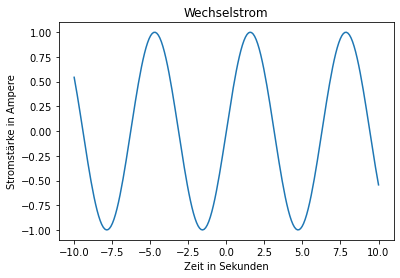

In [5]:
# data
x = np.linspace(-10,10,200)
y = np.sin(x)

# plot
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlabel('Zeit in Sekunden')
ax.set_ylabel('Stromstärke in Ampere')
ax.set_title('Wechselstrom');

Zuletzt soll unser Plot gespeichert werden. Es stehen mehrere Grafikformate zur
Verfügung. Mehr Details finden Sie auf der Internetseite [Dokumentation
savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).
Ein typisches Ausgabeformat ist eine Rastergrafik wie z.B. png. 

Da die komplette Grafik (= Figure) gespeichert werden soll, wird `.savefig()`
auf das Objekt `fig` angewendet:

In [6]:
fig.savefig('plot_stromstaerke.png', dpi=300);

```{admonition} Mini-Übung
:class: miniexercise 
Bitte plotten Sie folgende Funktionen: 
    
* lineare Funktion, z.B. f(x) = 7x + 2
* Sinus,
* Kosinus,
* Exponentialfunktion und
* Wurzelfunktion.

Verändern Sie auch das Definitionsgebiet der Funktionen, also das Intervall für
$x$. (Bei welcher Funktion müssen Sie besonders auf das Defiitionsgebiet der
Funktion achten?)
```

In [7]:
# Hier Ihr Code:

````{admonition} Lösung
:class: minisolution, toggle
```python
import matplotlib.pylab as plt
import numpy as np

x1 = np.linspace(-3, 3, 101)
y1 = 3 * x1 + 7

x2 = np.linspace(-2 * np.pi, 2 * np.pi, 101)
y2 = np.sin(x2)
y3 = np.cos(x2)

x4 = np.linspace(-3, 3, 101)
y4 = np.exp(x4)

x5 = np.linspace(0, 5, 101)
y5 = np.sqrt(x5)

fig, ax = plt.subplots()
ax.plot(x5,y5)
ax.set_xlabel('x-Achse')
ax.set_ylabel('y-Achse')
ax.set_title('Mini-Übung');
```
````

## Balkendiagramme

Mit der Methode `.bar()` kann ein Balkendiagramm erstellt werden. Nehmen wir mal
an, wir möchten auswerten, wie viele Nutzer/innen in Moodle auf die Jupyter
Notebooks zum Download zugegriffen haben:

| Woche | Anzahl Nutzer/innen |
| --- | --- |
| 2 | 14 |
| 3 | 12 |
| 4 | 10 |
| 5 | 10 |
| 6 | 9  |

Dann wird das Balkendiagramm mit folgenden Code erzeugt:

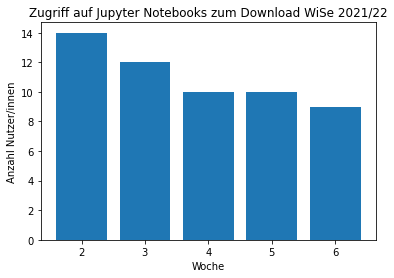

In [8]:
# data
x = [2,3,4,5,6]
y = [14,12,10,10,9]

# bar plot
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Woche')
ax.set_ylabel('Anzahl Nutzer/innen')
ax.set_title('Zugriff auf Jupyter Notebooks zum Download WiSe 2021/22');

```{admonition} Mini-Übung
:class: miniexercise 

Hier ist eine Tabelle mit den Zugriffszahlen auf das MATLAB Live Script in der
Vorlesung angewandte Informatik im Sommersemester 2021. Bitte stellen Sie die
Daten als Balkendiagramm inklusive Beschriftungen dar.

|Woche |Anzahl Nutzer/innen|
| --- | --- |
| 3 | 9  |
| 4 | 17 |
| 5 | 15 |
| 6 | 10 |
| 7 | 11 |
```

In [9]:
# Hier Ihr Code:

````{admonition} Lösung
:class: minisolution, toggle
```python
import matplotlib.pylab as plt
import numpy as np

x = [3, 4, 5, 6, 7]
y = [9, 17, 15, 10, 11]

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Woche')
ax.set_ylabel('Zugriffe')
ax.set_title('Zugriffszahlen MATLAB Live Skripte SoSe 22');
```
````

## Streudiagramme

Bei Streudiagrammen werden nicht die Punkte $(x_1,y_2)$ mit $(x_2,y_2)$ mit
$(x_3,y_3)$ usw. durch Linien verbunden, sondern jeder Punkt selbst wird an der
Stelle seiner Koordinaten eingezeichnet. Ob dazu ein Punkt, Kreis, Dreieck oder
Quadrat oder ein anderes Symbol verwendet wird, bleibt dem Anwender überlassen.
Streudiagramme heißen im Englischen Scatter-Plot, daher lautet die entsprechende
Matplotlib-Methode auch ``.scatter()``.

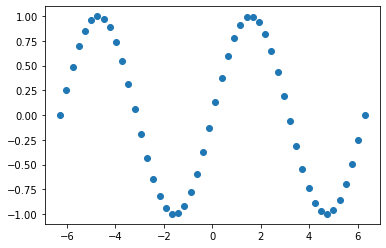

In [10]:
# data
x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.sin(x)

# scatter plot
fig, ax = plt.subplots()
ax.scatter(x,y);

Über die Option ``marker= `` lässt sich das Symbol einstellen, mit dem das
Streudiagramm erzeugt wird. Wie Sie sehen, ist ein ausgefüllter Kreis
voreingestellt. Lesen Sie auf der Internetseite 

> https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

nach, welche Marker-Symbole existieren. Probieren Sie einige der Symbole hier
aus:

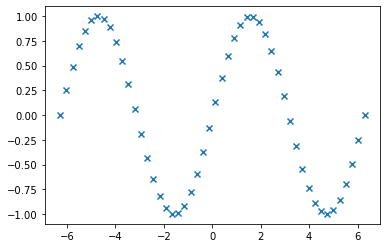

In [11]:
# data
x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = np.sin(x)

# scatter plot
fig, ax = plt.subplots()
ax.scatter(x,y, marker='x');

Für bekannte Funktionen wie Sinus oder Kosinus würde man Liniendiagramme
verwenden. Streudiagramme eignen sich eher für die Visualisierung einzelner
Messungen. Wenn Sie beispielsweise an jeden Wochentag die Temperatur an zwei
Orten messen, bietet es sich an, beide Messreihen in einem Streudiagramm zu
visualisieren. Dazu sollten Sie unterschiedliche Marker und unterschiedliche
Farben verwenden.

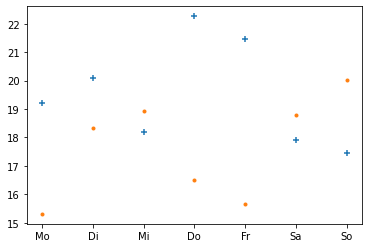

In [12]:
# data
x  = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
y1 = np.random.uniform(15,23,7)
y2 = np.random.uniform(15,23,7)

# scatter plots
fig, ax = plt.subplots()
ax.scatter(x, y1, marker='+')
ax.scatter(x, y2, marker='.');

Dann ist es aber auch gut, die Visualisierung zu beschriften. Dazu kennzeichnet
man jeden einzelnen Plot-Aufruf mit einem sogenannten Label, z.B.

```python
ax.scatter(x,y1, label='Messung1')
```
Zuletzt verwendet man die Methode `ax.legend()`, die eine Legende mit allen
Label-Einträgen erzeugt, bei denen die Farben der Kurven und die Marker korrekt
zu den Namen (Labels) zugeordnet werden.

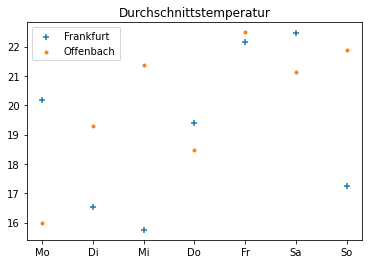

In [13]:
# data
x  = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
y1 = np.random.uniform(15,23,7)
y2 = np.random.uniform(15,23,7)

# scatter plots
fig, ax = plt.subplots()
ax.scatter(x, y1, marker='+', label='Frankfurt')
ax.scatter(x, y2, marker='.', label='Offenbach')
ax.legend()
ax.set_title('Durchschnittstemperatur');

```{admonition} Mini-Übung
:class: miniexercise 
Stellen Sie die Sinus-Funktion im Intervall $[-4\pi,4\pi]$ als Scatter-Plot dar.
Dabei sollen negative Funktionswerte blau eingefärbt werden und positive
Funktionswerte rot. Setzen Sie zusätzlich an Nullstellen einen schwarzen
Diamanten.     
```

In [14]:
# Hier Ihr Code

````{admonition} Lösung
:class: minisolution, toggle
```python
import matplotlib.pylab as plt
import numpy as np

# data 
x = np.linspace(-4*np.pi, 4*np.pi, 100)
y = np.sin(x)
my_color = []
for y_i in y:
    if y_i <= 0:
        my_color.append('b')
    else:
        my_color.append('r')
x_diamond = np.arange(-4*np.pi, 5*np.pi, np.pi)
y_diamond = np.zeros(np.shape(x_diamond))

# plot
fig, ax = plt.subplots()
ax.scatter(x,y, c=my_color)
ax.scatter(x_diamond, y_diamond, marker='D', c='k')
```
````

## Zusammenfassung und Ausblick

In diesem Abschnitt haben wir die drei wichtigsten Diagrammtypen wiederholt. Das
Linien- und das Streudiagramm werden für die Visualisierung von kontinuierlichen
Daten verwendet, wohingegen das Balkendiagramm dem Plot von diskreten Daten
(Kategorien) dient. Im folgenden Abschnitt verknüpfen wir Matplotlib mit Pandas
zur Visualisierung von Tabellendaten in einem DataFrame.